## [Problem 1] Number of wheat on a 2 x 2 square chess board
Represent a 2 x 2 square chessboard by ndarray and calculate the number of wheat in each square. After placing one wheat on the upper left square, proceed to two to the right, four to the lower left, and eight to the lower right.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_squares = 4
index = 0
small_board_list = []

while index < n_squares:
    small_board_list.append(2**index)
    index += 1

small_board_ndarray = np.array(small_board_list).reshape(2,2)
print("Arrange wheat on a plate of 4 squares (ndarray)：\n{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：
[[1 2]
 [4 8]]


## [Problem 2] Expansion to n × m mass
Create a function that returns a ndarray containing the number of wheat on an nxm chess board. Then use this function to find the number of wheat on the 8x8 square chess board.

In [3]:
def chess_board(n,m):
    n_squares = n*m
    index = 0
    chess_board_list = []
    
    while index < n_squares:
        chess_board_list.append(2**index)
        index += 1

    return chess_board_list

In [4]:
n=8
m=8
board_list = chess_board(n,m)
board_ndarray = np.array(board_list).reshape(n,m)
print("Arrange wheat on a plate of {} squares (ndarray)：\n{}".format(n*m,board_ndarray))

Arrange wheat on a plate of 64 squares (ndarray)：
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e

## [Problem 3] Total number of wheat
Find the total number of wheat on a chess board of 8 x 8 squares. Also, find the average of each column and visualize it in a bar chart.

In [5]:
def total_wheat(n,m):
    index = 0
    total = 0
    board_list = chess_board(n,m)
    
    while index < n*m:
        total += board_list[index]
        index += 1
    
    return total

In [6]:
n=8
m=8
total = total_wheat(n,m)
print("Total wheat on a {} squares chess board: {}".format(n*m,total))

Total wheat on a 64 squares chess board: 18446744073709551615


In [7]:
def col_average(n,m):
    index = 0
    average_list = []
    board_list = chess_board(n,m)
    board_ndarray = np.array(board_list).reshape(n,m)
    
    while index < m:
        average_list.append(sum(board_ndarray[:,index])/m)
        index += 1
    
    average = np.array(average_list)
        
    return average

In [8]:
n = 8
m = 8

average = col_average(n,m)
print(average)

[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


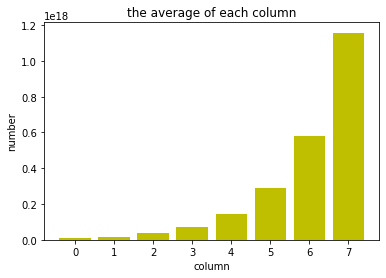

In [9]:
plt.xlabel("column")
plt.ylabel("number")
plt.title("the average of each column")
plt.bar(np.arange(len(average)),average,color='y')
plt.show()

## [Problem 4] Heat map of the number of wheat
Visualize the number of wheat on the 8x8 chess board as a heat map.

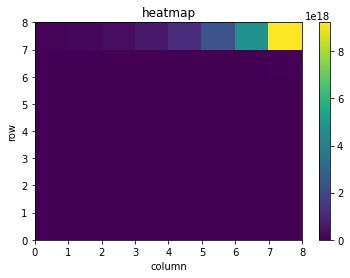

In [10]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")

plt.pcolor(board_ndarray)
plt.colorbar()
plt.show()

## [Problem 5] How many times is the second half as long as the first half?
Find how many times the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half. The first half is lines 0 to 3 of the array, and the second half is lines 4 to 7.

In [11]:
first_half = sum(board_ndarray[3,:])
second_half = board_ndarray[3:,:].sum()
print("The first half: {}".format(first_half))
print("The second half: {}".format(second_half))
print("The second half number of wheat is {} times larger than the first half"
      .format(second_half/first_half))

The first half: 4278190080.0
The second half: 1.8446744073692774e+19
The second half number of wheat is 4311810305.0 times larger than the first half


## [Problem 6] Expansion to n × m mass by another calculation method
Create a new function similar to Problem 2 that returns an ndarray containing the number of wheat squares on an n×m chessboard, one usingnp.append ()and one using broadcast.

In [49]:
def append_chess_board(n,m):
    n_squares = n*m
    append_board_ndarray = np.array([1])
    
    for _ in range(n_squares-1):
        append_board_ndarray = np.append(append_board_ndarray,2*append_board_ndarray[-1])
    
    return append_board_ndarray

In [50]:
n,m = 4,4
append_board_ndarray = append_chess_board(n,m)
print("Arrange wheat on a plate of {} squares (ndarray)：\n{}".format(n*m,append_board_ndarray))

Arrange wheat on a plate of 16 squares (ndarray)：
[    1     2     4     8    16    32    64   128   256   512  1024  2048
  4096  8192 16384 32768]


In [47]:
def broadcast_chess_board(n,m):
    n_squares = n*m
    indices_of_squares = np.arange(n_squares)
    return 2**(indices_of_squares)

In [48]:
n,m = 4,4
broadcast_board = broadcast_chess_board(n,m)
print("Arrange wheat on a plate of {} squares (ndarray)：\n{}".format(n*m,broadcast_board))

Arrange wheat on a plate of 16 squares (ndarray)：
[    1     2     4     8    16    32    64   128   256   512  1024  2048
  4096  8192 16384 32768]


## [Problem 7] Comparing calculation times
We've seen three different ways. Each calculation time of Jupyter Notebook %%timeit

Please measure using and compare and consider.

In [54]:
%%timeit
n,m = 4,4
append_board_ndarray = append_chess_board(n,m)
#print("Arrange wheat on a plate of {} squares (ndarray)：\n{}".format(n*m,append_board_ndarray))

86 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
%%timeit
n,m = 4,4
broadcast_board = broadcast_chess_board(n,m)
# print("Arrange wheat on a plate of {} squares (ndarray)：\n{}".format(n*m,broadcast_board))

1.59 µs ± 26.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


> After measure the execution time, we can see that broadcasting will be faster than using append()